# Regression

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import os
import os.path as op

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pickle as pkl

from scipy import stats
from scipy.optimize import least_squares # used

In [3]:
p_db = op.join(os.getcwd(),'..','..','data','Extra')
p_dat = op.join(p_db, 'Global_T_CO2.pkl')

In [4]:
data = pd.read_pickle(p_dat)
data = data.dropna()
data_sp = data.loc[data.Country == 'Spain']

In [5]:
data_sp

,Country,AverageTemperature,AverageTemperatureUncertainty,Annual_CO2
time,,,,
1830-01-01,Spain,3.011,4.665,3664.0
1830-02-01,Spain,6.480,2.027,3664.0
1830-03-01,Spain,11.044,1.922,3664.0
1830-04-01,Spain,13.557,2.564,3664.0
1830-05-01,Spain,15.750,2.010,3664.0
...,...,...,...,...
2013-04-01,Spain,12.188,0.303,252682710.7
2013-05-01,Spain,14.204,0.203,252682710.7
2013-06-01,Spain,19.364,0.315,252682710.7


Calculate annual means

In [6]:
data_y = data_sp.groupby(data_sp.index.year).mean()

time = data_y.index
temp = data_y.AverageTemperature.values

Text(0, 0.5, 'AverageTemperature')

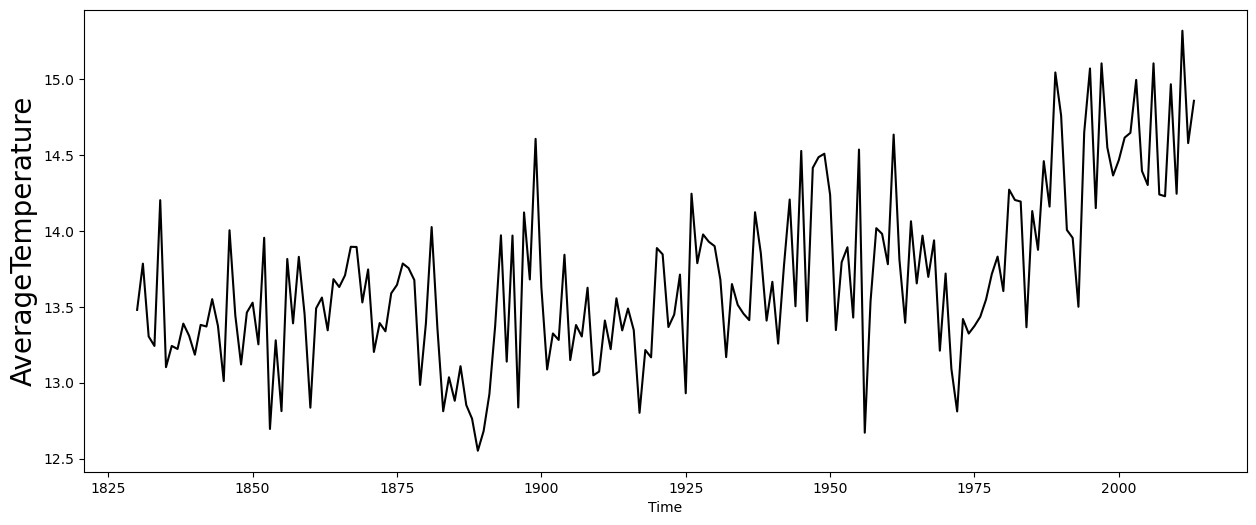

In [7]:
plt.figure(figsize = [15, 6])
plt.plot(time, temp, 'k')
plt.xlabel('Time')
plt.ylabel('AverageTemperature', fontsize = 20)


## Linear Regression

### Scipy Stats

In [8]:
res = stats.linregress(time, temp)

print('Model coefs -> Intercept : {0}, Slope : {1}'.format(res.intercept, res.slope) )

Model coefs -> Intercept : 2.1246698198198235, Slope : 0.006018060679175254


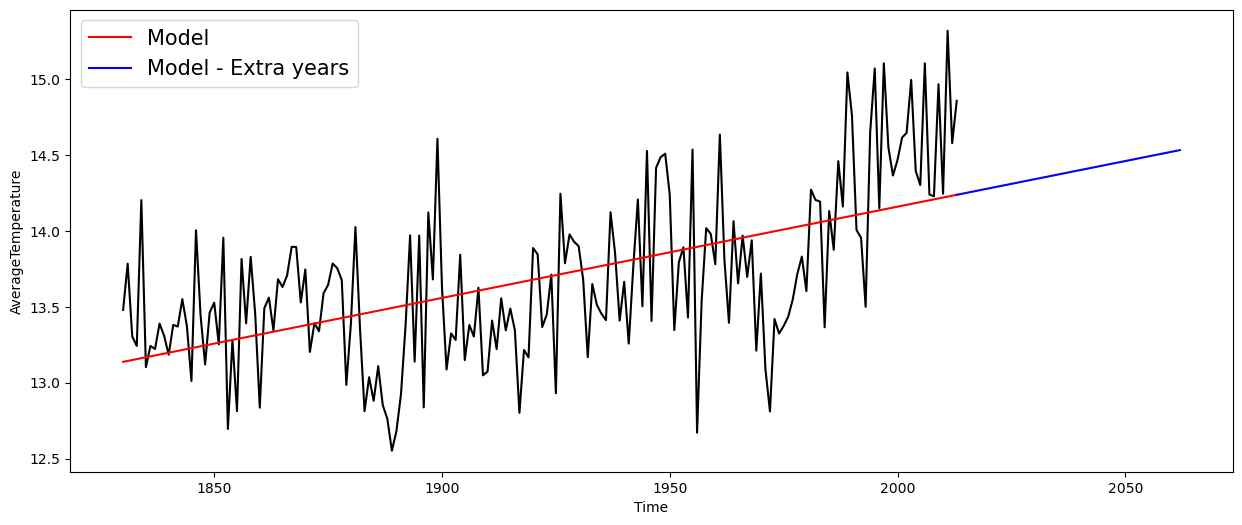

In [9]:
plt.figure(figsize = [15, 6])
plt.plot(time, temp, 'k')
plt.plot(time, res.intercept + res.slope*time, 'r', label='Model')

n_extra_years = 50

x1 = np.arange(max(time), max(time) + n_extra_years)
plt.plot(x1, res.intercept + res.slope*x1, 'b', label='Model - Extra years')

plt.xlabel('Time')
plt.ylabel('AverageTemperature')
plt.legend(fontsize = 15)

### Least Squares

In [10]:
def fun_linreg(x, time, temperature):
    return x[0] + x[1]*time - temperature

x0 = [1,1]

In [11]:
model_ls = least_squares(fun_linreg, x0, args=(time, temp))

In [12]:
# parameters variance
std = np.sqrt(np.diagonal(np.linalg.inv(model_ls.jac.T.dot(model_ls.jac))))
covar = np.linalg.inv(model_ls.jac.T.dot(model_ls.jac))

print('\nOptimal coefficients: ')
print(model_ls.x)
print('\nStandar deviation (s.e): ')
print(std)
print('\nCovariance matrix: ')
print(covar)


Optimal coefficients: 
[2.12466982 0.00601806]

Standar deviation (s.e): 
[2.66794308e+00 1.38793875e-03]

Covariance matrix: 
[[ 7.11792029e+00 -3.70152767e-03]
 [-3.70152767e-03  1.92637399e-06]]


## Polynomial

### Second degree

In [13]:
def fun_2nd(x, time, temperature):
    return x[0] + x[1]*time + x[2]*(time**2)- temperature

x0 = [1, 1, 1]

In [14]:
def fun_2nd_inv(time, a0, a1, a2):
    return a0 + a1*time + a2*(time**2)


In [15]:
model_2nd = least_squares(fun_2nd, x0, args=(time, temp))

In [16]:
# parameters variance
std = np.sqrt(np.diagonal(np.linalg.inv(model_2nd.jac.T.dot(model_2nd.jac))))
covar = np.linalg.inv(model_2nd.jac.T.dot(model_2nd.jac))

print('\nOptimal coefficients: ')
print(model_2nd.x)
print('\nStandar deviation (s.e): ')
print(std)
print('\nCovariance matrix: ')
print(covar)


Optimal coefficients: 
[ 2.63161167e+02 -2.65890461e-01  7.07542341e-05]

Standar deviation (s.e): 
[1.07821547e+02 1.12286444e-01 2.92162025e-05]

Covariance matrix: 
[[ 1.16254859e+04 -1.21059681e+01  3.14917163e-03]
 [-1.21059681e+01  1.26082456e-02 -3.28033287e-06]
 [ 3.14917163e-03 -3.28033287e-06  8.53586488e-10]]


Historical period with optimal parameters

In [17]:
temp_model = fun_2nd_inv(time, *model_2nd.x)

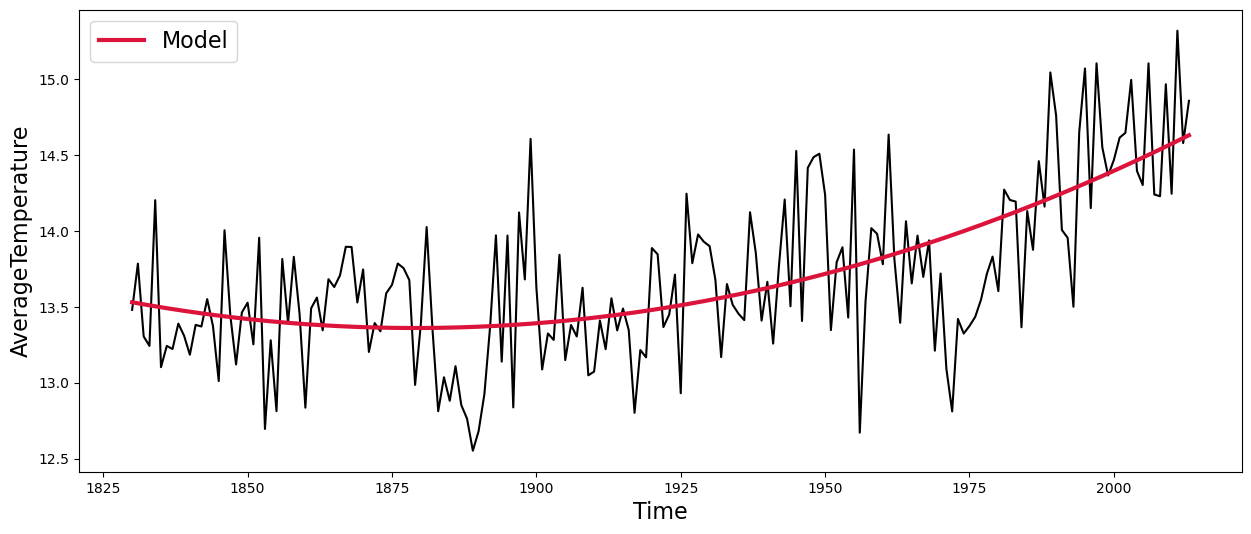

In [18]:
plt.figure(figsize = [15, 6])
plt.plot(time, temp, 'k')
plt.plot(time, temp_model, color = 'crimson', linewidth = 3, label = 'Model')

plt.xlabel('Time', fontsize = 16)
plt.ylabel('AverageTemperature', fontsize = 16)
plt.legend(fontsize = 16)

### Third degree

In [19]:
def fun_3rd(x, time, temperature):
    return x[0] + x[1]*time + x[2]*(time**2)  + x[3]*(time**3) - temperature

x0 = [1, 1, 1, 1]

In [20]:
def fun_3nd_inv(time, a0, a1, a2, a3):
    return a0 + a1*time + a2*(time**2) + a3*(time**3)


In [21]:
model_3nd = least_squares(fun_3rd, x0, args=(time, temp))

In [22]:
# parameters variance
std = np.sqrt(np.diagonal(np.linalg.inv(model_3nd.jac.T.dot(model_3nd.jac))))
covar = np.linalg.inv(model_3nd.jac.T.dot(model_3nd.jac))

print('\nOptimal coefficients: ')
print(model_3nd.x)
print('\nStandar deviation (s.e): ')
print(std)
print('\nCovariance matrix: ')
print(covar)


Optimal coefficients: 
[-2.85881151e+03  4.61285864e+00 -2.46944156e-03  4.40661895e-07]

Standar deviation (s.e): 
[4.43856158e+03 6.93505935e+00 3.61048848e-03 6.26310706e-07]

Covariance matrix: 
[[ 1.97008289e+07 -3.07806767e+04  1.60232711e+01 -2.77909830e-03]
 [-3.07806767e+04  4.80950482e+01 -2.50381303e-02  4.34293255e-06]
 [ 1.60232711e+01 -2.50381303e-02  1.30356270e-05 -2.26121355e-09]
 [-2.77909830e-03  4.34293255e-06 -2.26121355e-09  3.92265101e-13]]


In [23]:
temp_mod = fun_3nd_inv(time, *model_3nd.x)

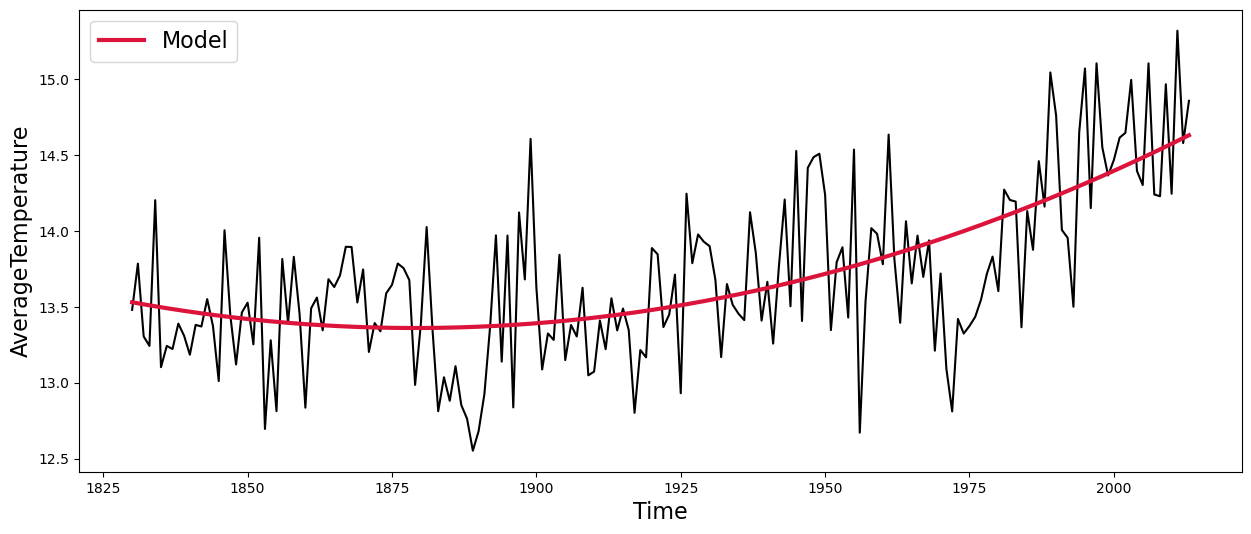

In [24]:
plt.figure(figsize = [15, 6])
plt.plot(time, temp, 'k')
plt.plot(time, temp_model, color = 'crimson', linewidth = 3, label = 'Model')

plt.xlabel('Time', fontsize = 16)
plt.ylabel('AverageTemperature', fontsize = 16)
plt.legend(fontsize = 16)

## Monthly

In [25]:
#Create a time vector
data_sp['time_vect'] = [day.dayofyear/365.25 + data_sp.index.year[d]-data_sp.index.year.min() \
                       for d, day in enumerate(data_sp.index)]

$$\textbf{Model 1: } y = a_0 + a_1*cos(2\pi t) + a_2*sin(2\pi t)$$

In [26]:
def fun_monthly(x, time, temperature):    
    return x[0] + x[1]*np.cos(2*np.pi*time) + x[2]*np.sin(2*np.pi*time) - temperature

x0 = [1,1,1]

In [27]:
def fun_monthly_inv(time, a0, a1, a2):    
    return a0 + a1*np.cos(2*np.pi*time) + a2*np.sin(2*np.pi*time)

In [28]:
time_month = data_sp.time_vect
temp_month = data_sp.AverageTemperature

In [29]:
model_month = least_squares(fun_monthly, x0, args=(time_month, temp_month))

In [30]:
# parameters variance
std = np.sqrt(np.diagonal(np.linalg.inv(model_month.jac.T.dot(model_month.jac))))
covar = np.linalg.inv(model_month.jac.T.dot(model_month.jac))

print('\nOptimal coefficients: ')
print(model_month.x)
print('\nStandar deviation (s.e): ')
print(std)
print('\nCovariance matrix: ')
print(covar)


Optimal coefficients: 
[13.71600199 -8.21044058 -1.2039589 ]

Standar deviation (s.e): 
[0.02130155 0.03015256 0.03009669]

Covariance matrix: 
[[ 4.53756186e-04 -2.52477095e-06 -5.08587947e-06]
 [-2.52477095e-06  9.09176954e-04 -3.53482101e-06]
 [-5.08587947e-06 -3.53482101e-06  9.05810526e-04]]


In [31]:
temp_mod = fun_monthly_inv(time_month, *model_month.x)

(0.0, 30.0)

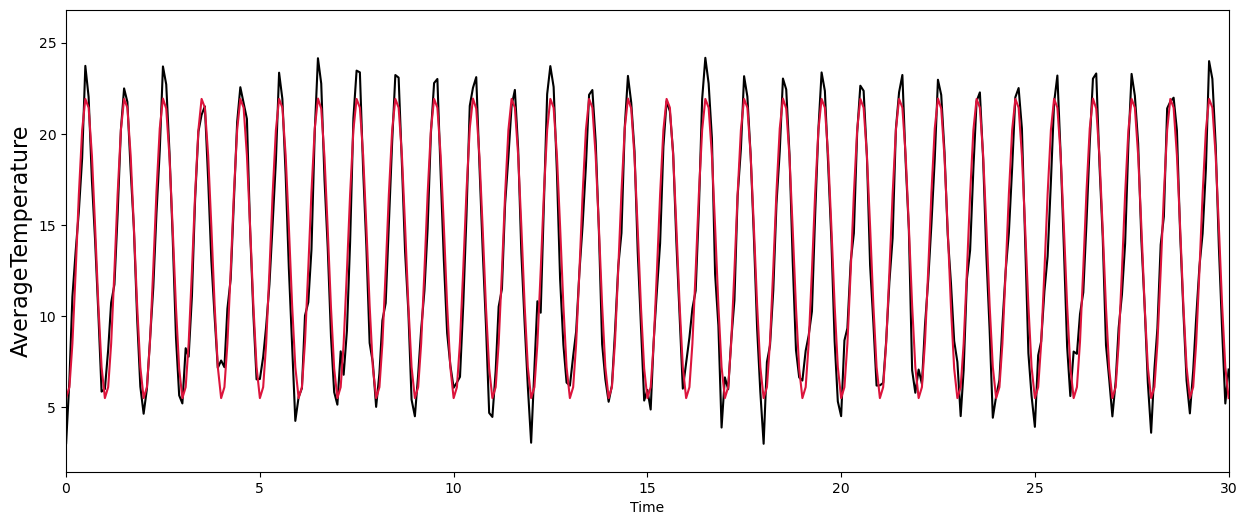

In [32]:
plt.figure(figsize = [15, 6])
plt.plot(time_month, temp_month, 'k')
plt.plot(time_month, temp_mod, color = 'crimson')

plt.xlabel('Time')
plt.ylabel('AverageTemperature', fontsize = 16)

plt.xlim([0, 30])